In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [2]:
train_EOSINOPHIL = os.path.join (r"C:\Users\shrey\OneDrive\Documents\Shreyas_Workspace\Projects\SML_Blood-Cell-Classification\wbc-type\images\TRAIN\EOSINOPHIL")

train_LYMPHOCYTE = os.path.join (r"C:\Users\shrey\OneDrive\Documents\Shreyas_Workspace\Projects\SML_Blood-Cell-Classification\wbc-type\images\TRAIN\LYMPHOCYTE")

train_MONOCYTE = os.path.join (r"C:\Users\shrey\OneDrive\Documents\Shreyas_Workspace\Projects\SML_Blood-Cell-Classification\wbc-type\images\TRAIN\MONOCYTE")

train_NEUTROPHIL = os.path.join (r"C:\Users\shrey\OneDrive\Documents\Shreyas_Workspace\Projects\SML_Blood-Cell-Classification\wbc-type\images\TRAIN\NEUTROPHIL")

In [3]:
test_EOSINOPHIL = os.path.join (r"C:\Users\shrey\OneDrive\Documents\Shreyas_Workspace\Projects\SML_Blood-Cell-Classification\wbc-type\images\TEST\EOSINOPHIL")

test_LYMPHOCYTE = os.path.join (r"C:\Users\shrey\OneDrive\Documents\Shreyas_Workspace\Projects\SML_Blood-Cell-Classification\wbc-type\images\TEST\LYMPHOCYTE")

test_MONOCYTE = os.path.join (r"C:\Users\shrey\OneDrive\Documents\Shreyas_Workspace\Projects\SML_Blood-Cell-Classification\wbc-type\images\TEST\MONOCYTE")

test_NEUTROPHIL = os.path.join (r"C:\Users\shrey\OneDrive\Documents\Shreyas_Workspace\Projects\SML_Blood-Cell-Classification\wbc-type\images\TEST\NEUTROPHIL")

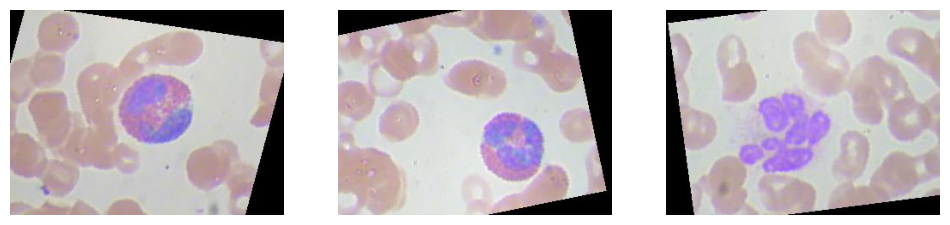

In [4]:
eosinophil_img = [os.path.join(train_EOSINOPHIL, file)
              for file in os.listdir(train_EOSINOPHIL)[:3]]
plt.figure(figsize=(12, 3))
for i, img_path in enumerate(eosinophil_img):
    sp = plt.subplot(1, 3, i+1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)

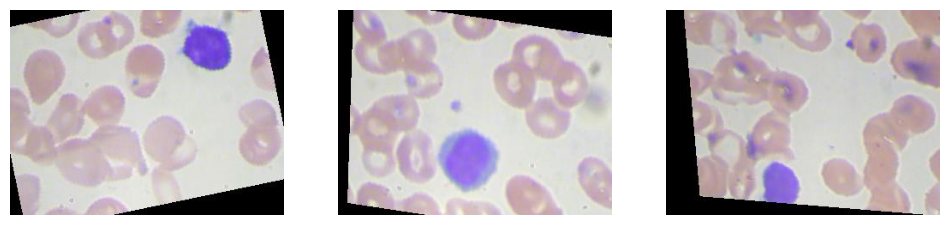

In [5]:
lymphocyte_img = [os.path.join(train_LYMPHOCYTE, file)
              for file in os.listdir(train_LYMPHOCYTE)[:3]]
plt.figure(figsize=(12, 3))
for i, img_path in enumerate(lymphocyte_img):
    sp = plt.subplot(1, 3, i+1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)

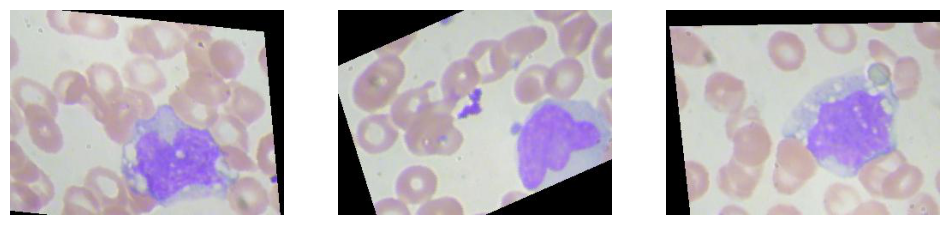

In [6]:
monocyte_img = [os.path.join(train_MONOCYTE, file)
              for file in os.listdir(train_MONOCYTE)[:3]]
plt.figure(figsize=(12, 3))
for i, img_path in enumerate(monocyte_img):
    sp = plt.subplot(1, 3, i+1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)

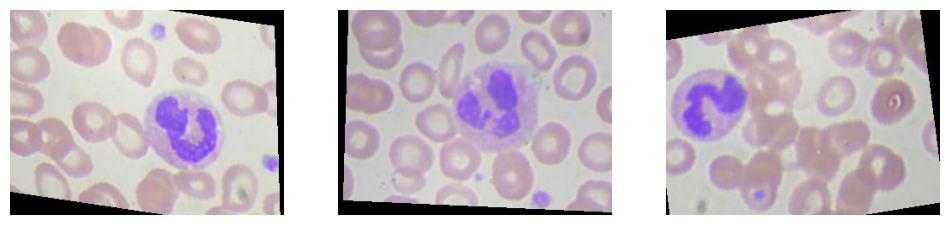

In [7]:
neutrophil_img = [os.path.join(train_NEUTROPHIL, file)
              for file in os.listdir(train_NEUTROPHIL)[:3]]
plt.figure(figsize=(12, 3))
for i, img_path in enumerate(neutrophil_img):
    sp = plt.subplot(1, 3, i+1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)

In [8]:
datagen = ImageDataGenerator()

In [9]:
train_generator = datagen.flow_from_directory(
    directory=r"C:\Users\shrey\OneDrive\Documents\Shreyas_Workspace\Projects\SML_Blood-Cell-Classification\wbc-type\images\TRAIN", 
    target_size=(128, 128), 
    batch_size=128, 
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    directory=r"C:\Users\shrey\OneDrive\Documents\Shreyas_Workspace\Projects\SML_Blood-Cell-Classification\wbc-type\images\TEST", 
    target_size=(128, 128), 
    batch_size=128, 
    class_mode='categorical'
)

Found 7967 images belonging to 4 classes.
Found 1990 images belonging to 4 classes.


***

# CNN

In [10]:
model = keras.models.Sequential([
    #Note the input shape is the size of the image 320x240 with 3 bytes color
    
    layers.Conv2D(filters = 32, kernel_size = 3, activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(pool_size = 2),
    layers.Dropout(0.2),
    
    layers.Conv2D(filters = 64, kernel_size = 3, activation='relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Dropout(0.2),
       
    layers.Conv2D(filters = 128, kernel_size = 3, activation='relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Dropout(0.2),
    
    layers.Conv2D(filters = 256, kernel_size = 3, activation='relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Dropout(0.2),
    
    # Flatten the results to feed into a DNN
    layers.Flatten(),
    
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(4, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

In [11]:
model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])

In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch=32,
    epochs=30,
    verbose=1, 
    validation_data=test_generator
)

Epoch 1/30
32/32 [==============================] - 118s 4s/step - loss: 24.1284 - accuracy: 0.2363 - val_loss: 1.3862 - val_accuracy: 0.2508
Epoch 2/30
32/32 [==============================] - 83s 3s/step - loss: 1.3867 - accuracy: 0.2637 - val_loss: 1.3863 - val_accuracy: 0.2508
Epoch 3/30
32/32 [==============================] - 67s 2s/step - loss: 1.3863 - accuracy: 0.2546 - val_loss: 1.3863 - val_accuracy: 0.2508
Epoch 4/30
32/32 [==============================] - 60s 2s/step - loss: 1.3860 - accuracy: 0.2506 - val_loss: 1.3863 - val_accuracy: 0.2518
Epoch 5/30
32/32 [==============================] - 60s 2s/step - loss: 1.3859 - accuracy: 0.2568 - val_loss: 1.3863 - val_accuracy: 0.2513
Epoch 6/30
32/32 [==============================] - 61s 2s/step - loss: 1.3866 - accuracy: 0.2454 - val_loss: 1.3863 - val_accuracy: 0.2508
Epoch 7/30
32/32 [==============================] - 60s 2s/step - loss: 1.3861 - accuracy: 0.2476 - val_loss: 1.3864 - val_accuracy: 0.2417
Epoch 8/30
32/32 [

In [ ]:
# model.save("model_1")

***

# ResNet

In [ ]:
# base_model = ResNet50(include_top=False, weights='imagenet')
# for layer in base_model.layers[:140]:
#     layer.trainable = False

In [ ]:
# model = keras.Sequential()

# model.add(layers.Input(shape=(240,320,3)))
# model.add(layers.Lambda(keras.applications.resnet50.preprocess_input))
# model.add(base_model)
# model.add(layers.GlobalAveragePooling2D())
# model.add(layers.Dense(4, activation='softmax'))

# model.summary()

In [ ]:
# model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# history = model.fit_generator(train_generator, epochs=1, validation_data=test_generator)